# SQL & Visualization Practice

## Student Info

- Student Name: 
- Partner Name (if applicable): 



<img src="https://raw.githubusercontent.com/jirvingphd/dsc-mod-3-project-online-ds-ft-100719/master/Northwind_ERD_updated.png" width=400px>

# Instructions:

> - **Your task is to create visualizations to help answer a few question that Northwind, Inc has about its customer's purchasing behaviors.** 
- Each visualization should have a 1-2 sentence explanation about your findings.

   
- **You must select the most appropriate visuals to help answer your question. Options include (but are not limited to):**
    - Scatter plots (color coded by group)
    - Bar plots of group means
    - Boxplots
    - Seaborn barplots, violinplots
    - etc.
    




       
    




- **Read the Visualization Requirements section for additional instructions.**



## Questions to Answer

-  **Question 1:  Does being discounted have an effect on the quantity of a product in an order (binary comparison, discount/no discount)?**
 - If so, at what level(s) of discount (multiple-group comparison)?
 
 
 
- **Question 2:  Does the time of year affect total Quantities sold?** (The time period analyzed is up to you: month,quarter, etc.) 



- **Question 3 (Optional): think of one additional question**  that you can answer to give Northwind some helpul business insights.

## Visualization Requirements

<!-- - **All visualizations (all `fig` objects) should be stored in one dictionary, called `figures` so that they can be displayed together in one final summary cell.**

```python
for question, fig in figures.items():
    print(f"\n\n{question}")
    display(fig)
    
``` -->
- **You must create figures using at least 2 out fo the following ways/approaches to making/starting a figure:**
    1. Use `fig,ax=plt.subplots` to start the figure and then use `ax` to do all of your plotting (e.g. `ax.bar`, `ax.scatter`)
    2. Start a figure with Pandas and then update the axis labels and title outside using the `ax` object that pandas returns combined with `ax.set_` methods.
    3. A Seaborn visualization that takes a whole dataframe and column names to plot(e.g. `sns.barplot(data=df,x='Discount',y="Quantity")`
    4. Use `plt` functions to create a plot and then `plt.gca()` and `plt.gcf()` to get the fig objects.
    
    
- **All visualizations are well labeled with:**
    - axes labels
    - a title
    - and a legend (when appropriate)
    
 

#### Visualization Tips
- Don't forget about our Master Cheat Sheets (all green sheets are plotting-related). 
    - https://drive.google.com/file/d/1PxRAhlaK7ucf0S2F732eJ94ovaPtUSE_/view?usp=sharing
    
    
- Remember that Pandas outputs an `ax` object whenever you use the `df.plot()` method (and most seaborn plots do too).
    - Axes have a `ax.get_figure()` method to get the Figure that goes with an Axes.
    
    
- Remember the 2 special `plt` functions that let us grab the figures and axes we create.
    - `plt.gca()` - get current axis
    - `plt.gcf()` - get current figure
 
 
- Seaborn and pandas both have options for separating your data for you using groups/color. 
    - Some seaborn functions accept a `hue` argument the name of the column to use to color the groups. (`hue='country'`)
    - Some pandas plots accept a similar `c` argument (`c="Discounted"`)
    
    

# SQL Tips/Resources


- The data tables are stored in the `Northwind_small.sqlite` file. 
    - Question 1 uses one table (orderDetail).
    - Questions 2+3 require a join. 
    

### Some SQL tips/reminders

- **To see all tables in a database:**
```python
"""SELECT name FROM sqlite_master WHERE type='table';"""
```

- **To see the information on a table:**
```python
"""PRAGMA table_info(orderDetail)"""
```

    - For more information on Pragma commands: 
        - https://www.sqlite.org/pragma.html
        
        
        
- **Reminder: if a table's name is also a SQL keyword you will have to put quotation marks around the table's name.**

# Your Work Here

In [2]:
import os
sorted(os.listdir())

['.DS_Store',
 '.git',
 '.gitattributes',
 '.gitignore',
 '.ipynb_checkpoints',
 'Northwind_ERD_updated.png',
 'Northwind_small.sqlite',
 'README.md',
 'resources',
 'solution.ipynb',
 'student.ipynb']

In [1]:
## Import matplotlib, pandas, sqlite3, seaborn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import sqlite3

In [4]:
## Connect to database with sqlite3
conn = sqlite3.connect('Northwind_small.sqlite')
conn

In [6]:
cur = conn.cursor()
cur

In [7]:
## Create the empty figures dictionary for later
figures ={}

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-mod-3-project-online-ds-ft-100719/master/Northwind_ERD_updated.png">

##  Q1: Does being discounted have an effect on the quantity of a product in an order?

### Your Work:
- insert as many cells as you need to/would like
- Save the final visual's `Figure` (fig) into the figure dictionary. 

In [12]:
q="""SELECT * FROM OrderDetail;"""
df = pd.DataFrame(cur.execute(q).fetchall())
cols = [name[0] for name in cur.description]
df

,0,1,2,3,4,5
0,10248/11,10248,11,14.00,12,0.00
1,10248/42,10248,42,9.80,10,0.00
2,10248/72,10248,72,34.80,5,0.00
3,10249/14,10249,14,18.60,9,0.00
4,10249/51,10249,51,42.40,40,0.00
...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03
2151,11077/66,11077,66,17.00,1,0.00
2152,11077/73,11077,73,15.00,2,0.01
2153,11077/75,11077,75,7.75,4,0.00


In [19]:
df = pd.read_sql(q,conn)
df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.00,12,0.00
1,10248/42,10248,42,9.80,10,0.00
2,10248/72,10248,72,34.80,5,0.00
3,10249/14,10249,14,18.60,9,0.00
4,10249/51,10249,51,42.40,40,0.00
...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03
2151,11077/66,11077,66,17.00,1,0.00
2152,11077/73,11077,73,15.00,2,0.01
2153,11077/75,11077,75,7.75,4,0.00


In [22]:
df['Discount'].value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

In [27]:
df['discounted'] = df['Discount'] > 0
df['discounted'] = df['discounted'].map({True:"Discounted", False:"Full-Price"})
df
# df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,discounted
0,10248/11,10248,11,14.00,12,0.00,Full-Price
1,10248/42,10248,42,9.80,10,0.00,Full-Price
2,10248/72,10248,72,34.80,5,0.00,Full-Price
3,10249/14,10249,14,18.60,9,0.00,Full-Price
4,10249/51,10249,51,42.40,40,0.00,Full-Price
...,...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03,Discounted
2151,11077/66,11077,66,17.00,1,0.00,Full-Price
2152,11077/73,11077,73,15.00,2,0.01,Discounted
2153,11077/75,11077,75,7.75,4,0.00,Full-Price


In [28]:
df['discounted'] = (df['Discount'] > 0).map({True:"Discounted",
                                             False:"Full-Price"})
df
# df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,discounted
0,10248/11,10248,11,14.00,12,0.00,Full-Price
1,10248/42,10248,42,9.80,10,0.00,Full-Price
2,10248/72,10248,72,34.80,5,0.00,Full-Price
3,10249/14,10249,14,18.60,9,0.00,Full-Price
4,10249/51,10249,51,42.40,40,0.00,Full-Price
...,...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03,Discounted
2151,11077/66,11077,66,17.00,1,0.00,Full-Price
2152,11077/73,11077,73,15.00,2,0.01,Discounted
2153,11077/75,11077,75,7.75,4,0.00,Full-Price


<AxesSubplot:xlabel='discounted', ylabel='Quantity'>

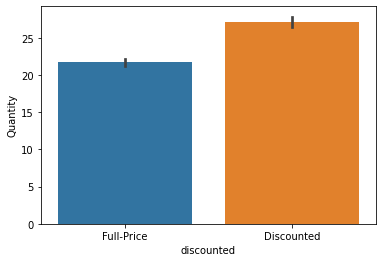

In [35]:
sns.barplot(data=df, x='discounted',y='Quantity',estimator=np.mean,
            ci=68)

<AxesSubplot:xlabel='Discount', ylabel='Quantity'>

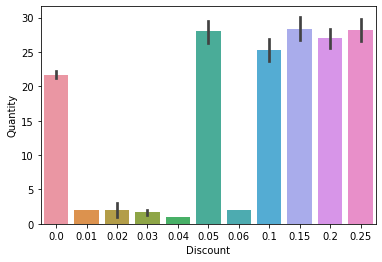

In [36]:
sns.barplot(data=df, x='Discount',y='Quantity',estimator=np.mean,
            ci=68)

<AxesSubplot:xlabel='Discount', ylabel='AVG(Quantity)'>

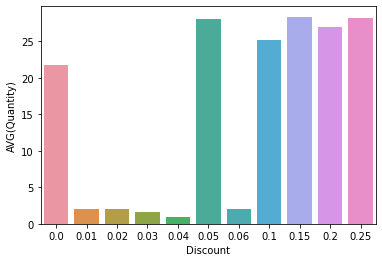

In [41]:
q = """SELECT Discount,AVG(Quantity) FROM orderDetail
GROUP BY Discount """
sns.barplot(data=pd.read_sql(q,conn), x='Discount', y='AVG(Quantity)')

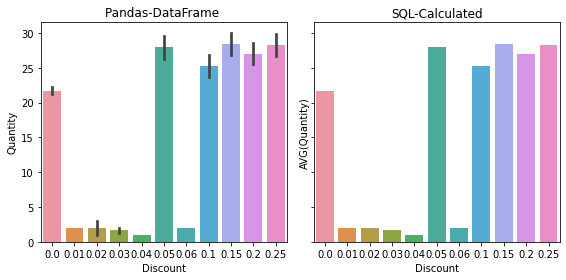

In [47]:
fig,axes = plt.subplots(ncols=2,figsize=(8,4),sharey=True)
sns.barplot(data=df, x='Discount',y='Quantity',estimator=np.mean,
            ci=68,ax=axes[0])
sns.barplot(data=pd.read_sql(q,conn), x='Discount', y='AVG(Quantity)',ax=axes[1])
axes[0].set_title('Pandas-DataFrame ')
axes[1].set_title('SQL-Calculated')


# [ax.set_ylim(0,30) for ax in axes]
plt.tight_layout()

In [48]:
df['Discount'].value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

> Exclude Discounts that had <4 occurances.

In [50]:
q = """SELECT Discount,AVG(Quantity) FROM orderDetail
GROUP BY Discount HAVING COUNT(Discount)>3"""
pd.read_sql(q,conn)

,Discount,AVG(Quantity)
0,0.00,21.715262
1,0.05,28.010811
2,0.10,25.236994
3,0.15,28.382166
4,0.20,27.024845
5,0.25,28.240260


<AxesSubplot:xlabel='Discount', ylabel='AVG(Quantity)'>

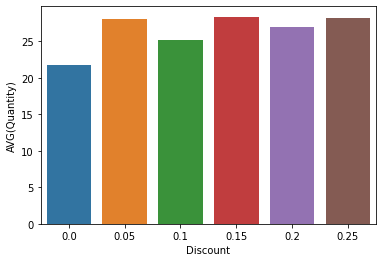

In [49]:
sns.barplot(data=pd.read_sql(q,conn), x='Discount', y='AVG(Quantity)')

### Your Findings/Summary
- 1-2 sentence summary of findings

> ...

##  Q2: : Does the time of year affect total Quantities sold?

### Your Work:
- insert as many cells as you need to/would like
- Save the final visual's `Figure` (fig) into the figure dictionary. 

In [70]:
q = """SELECT Quantity,OrderDate FROM OrderDetail 
JOIN "Order" ON OrderID"""
pd.read_sql(q,conn)

,Quantity,OrderDate
0,12,2012-07-04
1,12,2012-07-05
2,12,2012-07-08
3,12,2012-07-08
4,12,2012-07-09
...,...,...
1788645,2,2014-05-05
1788646,2,2014-05-06
1788647,2,2014-05-06
1788648,2,2014-05-06


In [66]:
q = """SELECT Quantity,OrderDate FROM OrderDetail  as od
JOIN "Order" as o 
USING o.OrderID=od.OrderID"""
pd.read_sql(q,conn)

DatabaseError: Execution failed on sql 'SELECT Quantity,OrderDate FROM OrderDetail  as od
JOIN "Order" as o 
USING o.OrderID=od.OrderID': near "o": syntax error

### Your Findings/Summary
- 1-2 sentence summary of findings

> ...

## Question 3 (optional)

### Your Work:
- insert as many cells as you need to/would like
- Save the final visual's `Figure` (fig) into the figure dictionary. 

### Your Findings/Summary
- 1-2 sentence summary of findings

> ...

# Conclusions

- Recap your 3 questions and answers.